In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                       n_targets=1, noise=20, random_state=13)

In [3]:
# Initialize parameters
m = -127.82
b = 150
lr = 0.001
epochs = 30

In [4]:
# Store history for visualization
all_m = []
all_b = []
all_cost = []

In [23]:
# Vectorized implementation (faster and cleaner)
for epoch in range(epochs):
    y_pred = m * X.ravel() + b  # Vectorized prediction
    error = y - y_pred
    
    # Vectorized gradients
    grad_m = -2 * np.dot(X.ravel(), error) / len(X)
    grad_b = -2 * np.sum(error) / len(X)
    
    # Update parameters
    m -= lr * grad_m
    b -= lr * grad_b
    
    # Store history
    all_m.append(m)
    all_b.append(b)
    all_cost.append(np.mean(error**2))

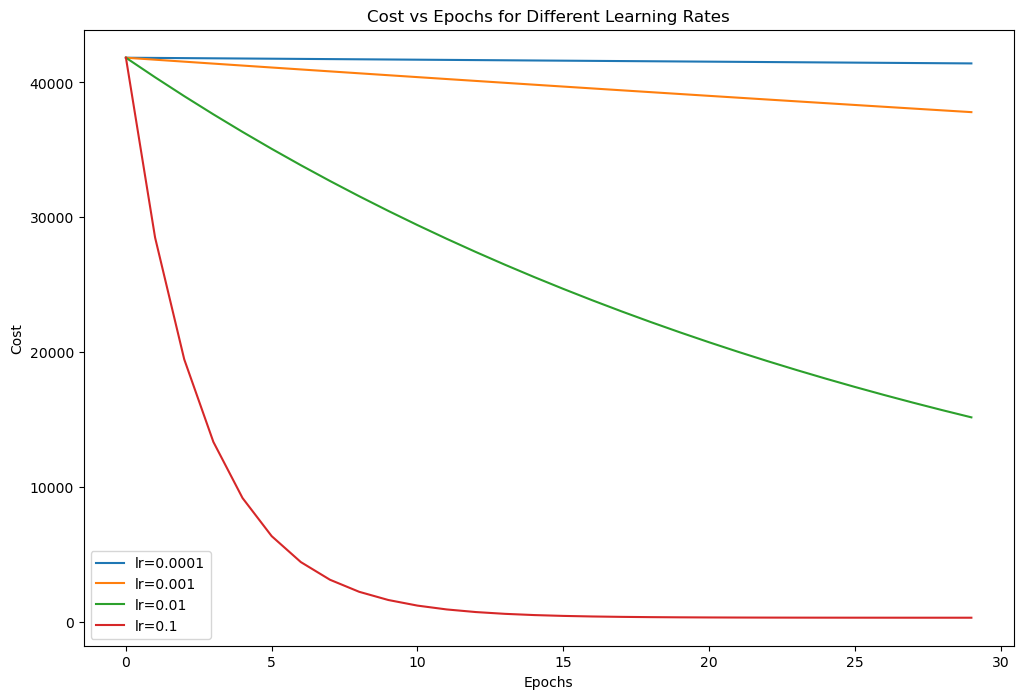

In [24]:
# Test different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1]
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    m_temp, b_temp = -127.82, 150
    costs = []
    
    for epoch in range(epochs):
        y_pred = m_temp * X.ravel() + b_temp
        error = y - y_pred
        m_temp -= lr * (-2 * np.dot(X.ravel(), error) / len(X))
        b_temp -= lr * (-2 * np.sum(error) / len(X))
        costs.append(np.mean(error**2))
    
    plt.plot(costs, label=f'lr={lr}')

plt.title('Cost vs Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [25]:
# Gradient descent with early stopping
m, b = -127.82, 150
prev_cost = float('inf')
tolerance = 1e-6

for epoch in range(epochs):
    y_pred = m * X.ravel() + b
    error = y - y_pred
    cost = np.mean(error**2)
    
    # Early stopping check
    if abs(prev_cost - cost) < tolerance:
        print(f"Converged at epoch {epoch}")
        break
        
    prev_cost = cost
    
    # Update parameters
    grad_m = -2 * np.dot(X.ravel(), error) / len(X)
    grad_b = -2 * np.sum(error) / len(X)
    m -= lr * grad_m
    b -= lr * grad_b

In [27]:
from sklearn.linear_model import LinearRegression

# Scikit-learn implementation
lr_sklearn = LinearRegression()
lr_sklearn.fit(X, y)

print("\nComparison with Scikit-Learn:")
print(f" model - m: {m:.4f}, b: {b:.4f}")
print(f"Sklearn - m: {lr_sklearn.coef_[0]:.4f}, b: {lr_sklearn.intercept_:.4f}")


Comparison with Scikit-Learn:
 model - m: 27.1594, b: -1.9396
Sklearn - m: 27.8281, b: -2.2947


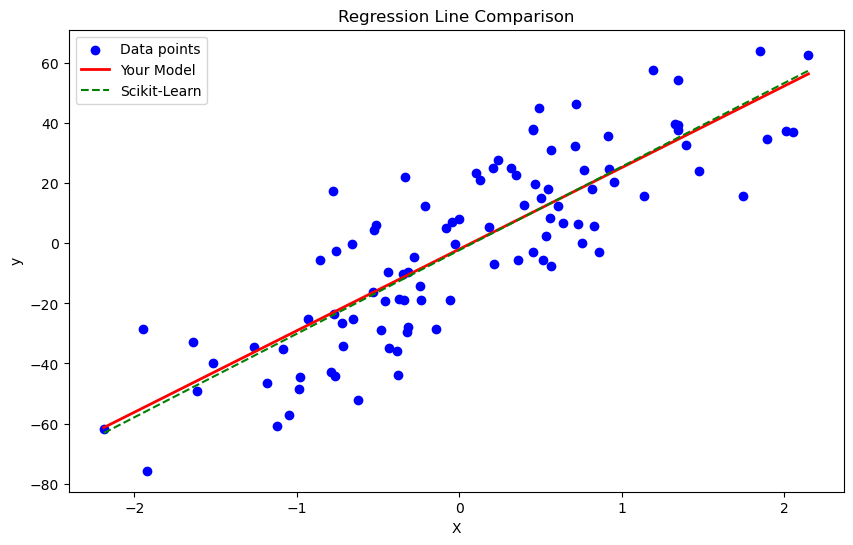

In [ ]:
# Final prediction visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')

# model's prediction
x_range = np.linspace(X.min(), X.max(), 100)
plt.plot(x_range, m*x_range + b, color='red', 
         linewidth=2, label='Your Model')

# Scikit-learn's prediction
plt.plot(x_range, lr_sklearn.predict(x_range.reshape(-1, 1)), 
         color='green', linestyle='--', 
         label='Scikit-Learn')

plt.title('Regression Line Comparison')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

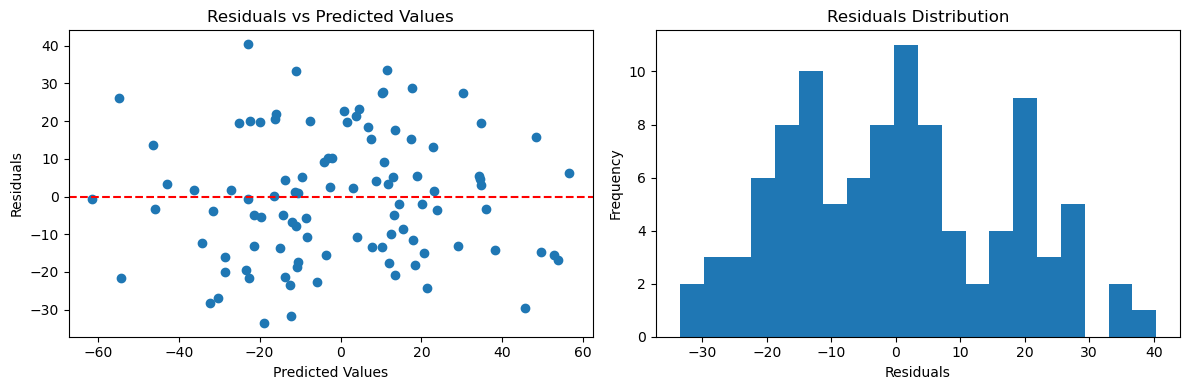

In [29]:
# Residual analysis
y_pred = m * X.ravel() + b
residuals = y - y_pred

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

ValueError: 'c' argument has 30 elements, which is inconsistent with 'x' and 'y' with size 60.

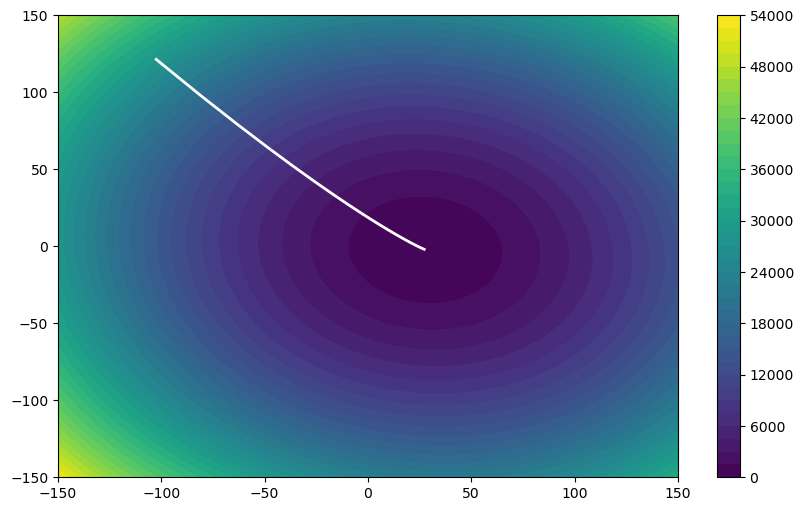

In [30]:
# Create contour plot
plt.figure(figsize=(10,6))
cp = plt.contourf(mGrid, bGrid, cost_grid, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.plot(all_m, all_b, 'w-', linewidth=2)
plt.scatter(all_m, all_b, c=range(epochs), cmap='cool', s=50)
plt.title('Gradient Descent Path on Cost Surface')
plt.xlabel('Slope (m)')
plt.ylabel('Intercept (b)')
plt.show()

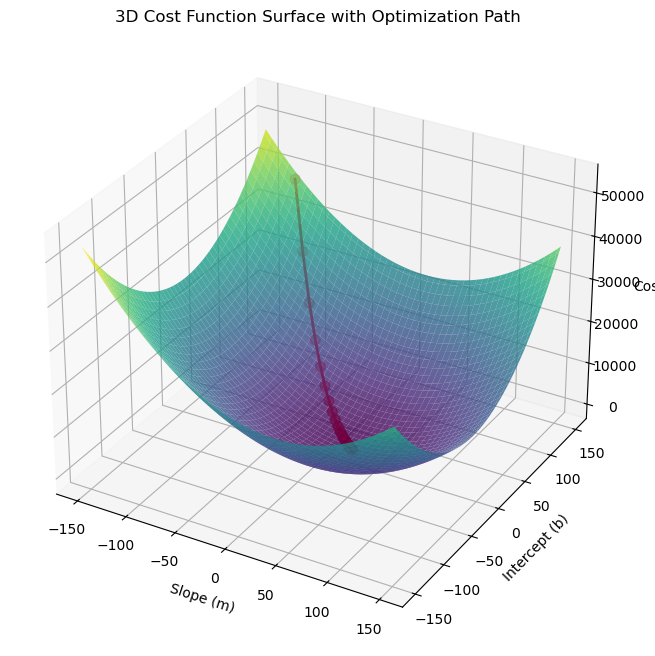

In [20]:
# Create 3D visualization
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(mGrid, bGrid, cost_grid, cmap='viridis', alpha=0.8)
ax.plot(all_m, all_b, all_cost, 'r-', linewidth=2)
ax.scatter(all_m, all_b, all_cost, c='r', s=50)
ax.set_title('3D Cost Function Surface with Optimization Path')
ax.set_xlabel('Slope (m)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('Cost')
plt.show()